<a href="https://colab.research.google.com/github/Yogi-1999/Domain-Name-Value-Prediction-Systems/blob/main/Intelligent_Systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 24 kB/s 
     |████████████████████████████████| 199 kB 33.8 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=ca35e75a4380631a812b4eeb19ecb42e2fb23c7e0a695b18b34f2f415f0b0a98
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [2]:
# linking with SparkSession
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").appName('Your Group ID : 01').getOrCreate()

# Note: If you want to work with RDD, you should use: "from pyspark import SparkContext, SparkConf"

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load Data from Colab:

########## ONLY in Colab ##########
data = spark.read.option("header", "true").csv("/content/drive/MyDrive/Colab Notebooks/coursework_data.csv").toDF("Domain","category")
########## ONLY in Colab ##########

In [5]:
from pyspark.sql.functions import col, split, regexp_extract, explode, lower


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
import unittest

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

def run_tests():
  unittest.main(argv=[''], verbosity=1, exit=False)

In [7]:
dataset=data.select(split(data.Domain," ").alias("Domain"))
dataset.show()

+--------------------+
|              Domain|
+--------------------+
|[noriomatsumoto.com]|
|  [haplessmales.com]|
|[shivamchatuvedi....|
|[dailyfreebieoffe...|
|     [poniemall.com]|
|[iebilingueandres...|
|   [carrotberry.com]|
|         [79uub.com]|
| [swampnaturals.com]|
|        [kayo44.com]|
| [dailyskinmeds.com]|
|[openroadfishing....|
|[strangconstructi...|
|         [tviic.com]|
|        [ma-wst.com]|
|   [mosquitoszn.com]|
|[bearclawathletic...|
|[craftymonkeybin....|
|      [urvisoft.com]|
|[a-nation-once-ag...|
+--------------------+
only showing top 20 rows



In [8]:
words=dataset.select(explode(col("Domain")).alias("Domain"))
words.show()

+--------------------+
|              Domain|
+--------------------+
|  noriomatsumoto.com|
|    haplessmales.com|
| shivamchatuvedi.com|
|dailyfreebieoffer...|
|       poniemall.com|
|iebilingueandresb...|
|     carrotberry.com|
|           79uub.com|
|   swampnaturals.com|
|          kayo44.com|
|   dailyskinmeds.com|
| openroadfishing.com|
|strangconstructio...|
|           tviic.com|
|          ma-wst.com|
|     mosquitoszn.com|
|bearclawathletics...|
| craftymonkeybin.com|
|        urvisoft.com|
|a-nation-once-aga...|
+--------------------+
only showing top 20 rows



In [9]:
words_lower=words.select(lower(col("Domain")).alias("Domain"))
words_lower.show()

+--------------------+
|              Domain|
+--------------------+
|  noriomatsumoto.com|
|    haplessmales.com|
| shivamchatuvedi.com|
|dailyfreebieoffer...|
|       poniemall.com|
|iebilingueandresb...|
|     carrotberry.com|
|           79uub.com|
|   swampnaturals.com|
|          kayo44.com|
|   dailyskinmeds.com|
| openroadfishing.com|
|strangconstructio...|
|           tviic.com|
|          ma-wst.com|
|     mosquitoszn.com|
|bearclawathletics...|
| craftymonkeybin.com|
|        urvisoft.com|
|a-nation-once-aga...|
+--------------------+
only showing top 20 rows



In [10]:
words_clean=words_lower.select(regexp_extract(col("Domain"),"[a-z]*",0).alias("Domain"))
words_clean.show()

+--------------------+
|              Domain|
+--------------------+
|      noriomatsumoto|
|        haplessmales|
|     shivamchatuvedi|
|   dailyfreebieoffer|
|           poniemall|
|iebilingueandresb...|
|         carrotberry|
|                    |
|       swampnaturals|
|                kayo|
|       dailyskinmeds|
|     openroadfishing|
|  strangconstruction|
|               tviic|
|                  ma|
|         mosquitoszn|
|   bearclawathletics|
|     craftymonkeybin|
|            urvisoft|
|                   a|
+--------------------+
only showing top 20 rows



In [11]:
words_nonull=words_clean.where(col("Domain")!="")
words_nonull.show()

+--------------------+
|              Domain|
+--------------------+
|      noriomatsumoto|
|        haplessmales|
|     shivamchatuvedi|
|   dailyfreebieoffer|
|           poniemall|
|iebilingueandresb...|
|         carrotberry|
|       swampnaturals|
|                kayo|
|       dailyskinmeds|
|     openroadfishing|
|  strangconstruction|
|               tviic|
|                  ma|
|         mosquitoszn|
|   bearclawathletics|
|     craftymonkeybin|
|            urvisoft|
|                   a|
|            idahobed|
+--------------------+
only showing top 20 rows



In [12]:
groups=words_nonull.groupby(col("Domain"))
print(groups)

In [13]:
results = words_nonull.groupby(col("Domain")).count()
print(results)

DataFrame[Domain: string, count: bigint]


In [14]:
results.show()

+--------------------+-----+
|              Domain|count|
+--------------------+-----+
|               yybet|    7|
|    gnarlycurmudgeon|    1|
|careerbrandaccele...|    1|
|          aurimaglow|    1|
|         nammalefana|    1|
|      vpdetailmyride|    1|
|              szhxzk|    1|
|            medicare|    1|
|          litbikinis|    1|
|           veeostore|    1|
|             acsurns|    1|
|               hrerb|    1|
|  houseofgemsjewelry|    1|
|               cdrss|    1|
|         tonycannata|    1|
|      sevenlakeslife|    1|
|                giga|    1|
|      coachbudandtee|    1|
|      greataswecanbe|    1|
|        outskirtland|    1|
+--------------------+-----+
only showing top 20 rows



In [15]:
from pyspark.sql.functions import length,col
no_of_words_per_letter_count=words_nonull.select(length(col("Domain")).alias("length")).groupby("length").count().show(5)

+------+-----+
|length|count|
+------+-----+
|    31|    9|
|    34|    2|
|    28|   18|
|    27|   26|
|    26|   30|
+------+-----+
only showing top 5 rows



In [16]:
results.orderBy("count",ascending=False).show(10)

+--------+-----+
|  Domain|count|
+--------+-----+
|      xn|   16|
|     www|   16|
|       a|   12|
|yaboyule|   11|
|    ybyl|    9|
|       v|    9|
| yulebet|    9|
|     bet|    8|
|       c|    8|
|      ag|    7|
+--------+-----+
only showing top 10 rows



In [17]:
# The total number of attacks per label
data.select('category').groupBy('category').count().orderBy('count', ascending=False).show()

+--------+-----+
|category|count|
+--------+-----+
|       1| 6000|
|       2| 2000|
|       3| 1000|
|       5|  500|
|       4|  500|
+--------+-----+



In [18]:
# Mapping of string into values on a random basis 
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler

stringIndexer = StringIndexer(inputCol="Domain", outputCol="Domain_encoded")
model = stringIndexer.fit(data)
indexed = model.transform(data)
indexed.show()

+--------------------+--------+--------------+
|              Domain|category|Domain_encoded|
+--------------------+--------+--------------+
|  noriomatsumoto.com|       1|        6262.0|
|    haplessmales.com|       1|        3959.0|
| shivamchatuvedi.com|       1|        7718.0|
|dailyfreebieoffer...|       1|        2382.0|
|       poniemall.com|       1|        6833.0|
|iebilingueandresb...|       1|        4315.0|
|     carrotberry.com|       1|        1748.0|
|           79uub.com|       1|         359.0|
|   swampnaturals.com|       1|        8298.0|
|          kayo44.com|       1|        4829.0|
|   dailyskinmeds.com|       1|        2384.0|
| openroadfishing.com|       1|        6462.0|
|strangconstructio...|       1|        8199.0|
|           tviic.com|       1|        9013.0|
|          ma-wst.com|       1|        5383.0|
|     mosquitoszn.com|       1|        5862.0|
|bearclawathletics...|       1|        1173.0|
| craftymonkeybin.com|       1|        2268.0|
|        urvi

In [19]:
from pyspark.ml.feature import OneHotEncoder, VectorAssembler
encoder = OneHotEncoder(dropLast=False, inputCol="Domain_encoded", outputCol="Domain_vec")
encoded = encoder.fit(indexed)
encoded=encoded.transform(indexed)
encoded.show(2)

+------------------+--------+--------------+--------------------+
|            Domain|category|Domain_encoded|          Domain_vec|
+------------------+--------+--------------+--------------------+
|noriomatsumoto.com|       1|        6262.0|(10000,[6262],[1.0])|
|  haplessmales.com|       1|        3959.0|(10000,[3959],[1.0])|
+------------------+--------+--------------+--------------------+
only showing top 2 rows



In [20]:
# We have converted the null values into integer by using the cast(IntegerType() for the label column in a given dataset 
from pyspark.sql.types import IntegerType
encoded=encoded.withColumn("category",encoded["category"].cast(IntegerType()))
encoded=encoded.withColumn("Domain_encoded",encoded["Domain_encoded"].cast(IntegerType()))
# encoded=encoded.withColumn("Domain_vec",encoded["Domain_vec"].cast(IntegerType()))


encoded=encoded.na.fill(0)
encoded.show()

+--------------------+--------+--------------+--------------------+
|              Domain|category|Domain_encoded|          Domain_vec|
+--------------------+--------+--------------+--------------------+
|  noriomatsumoto.com|       1|          6262|(10000,[6262],[1.0])|
|    haplessmales.com|       1|          3959|(10000,[3959],[1.0])|
| shivamchatuvedi.com|       1|          7718|(10000,[7718],[1.0])|
|dailyfreebieoffer...|       1|          2382|(10000,[2382],[1.0])|
|       poniemall.com|       1|          6833|(10000,[6833],[1.0])|
|iebilingueandresb...|       1|          4315|(10000,[4315],[1.0])|
|     carrotberry.com|       1|          1748|(10000,[1748],[1.0])|
|           79uub.com|       1|           359| (10000,[359],[1.0])|
|   swampnaturals.com|       1|          8298|(10000,[8298],[1.0])|
|          kayo44.com|       1|          4829|(10000,[4829],[1.0])|
|   dailyskinmeds.com|       1|          2384|(10000,[2384],[1.0])|
| openroadfishing.com|       1|          6462|(1

In [21]:
from pyspark.sql.functions import col
encoded=encoded.drop(col("Domain"))

In [22]:
# Converting the set of dataset features into the single vector or reffered to as an array of features
from pyspark.ml.feature import VectorAssembler
assembler=VectorAssembler(inputCols=(encoded.columns), outputCol="Price")
assembled_data = assembler.transform(encoded)
assembled_data.show(20)

+--------+--------------+--------------------+--------------------+
|category|Domain_encoded|          Domain_vec|               Price|
+--------+--------------+--------------------+--------------------+
|       1|          6262|(10000,[6262],[1.0])|(10002,[0,1,6264]...|
|       1|          3959|(10000,[3959],[1.0])|(10002,[0,1,3961]...|
|       1|          7718|(10000,[7718],[1.0])|(10002,[0,1,7720]...|
|       1|          2382|(10000,[2382],[1.0])|(10002,[0,1,2384]...|
|       1|          6833|(10000,[6833],[1.0])|(10002,[0,1,6835]...|
|       1|          4315|(10000,[4315],[1.0])|(10002,[0,1,4317]...|
|       1|          1748|(10000,[1748],[1.0])|(10002,[0,1,1750]...|
|       1|           359| (10000,[359],[1.0])|(10002,[0,1,361],...|
|       1|          8298|(10000,[8298],[1.0])|(10002,[0,1,8300]...|
|       1|          4829|(10000,[4829],[1.0])|(10002,[0,1,4831]...|
|       1|          2384|(10000,[2384],[1.0])|(10002,[0,1,2386]...|
|       1|          6462|(10000,[6462],[1.0])|(1

In [23]:
# Standardises features by removing the mean and scaling to unit variance using column summary statistics on the samples in the training set.
from pyspark.ml.feature import StandardScaler
scale=StandardScaler(inputCol='Price',outputCol='Standardized_Price')
data_scale=scale.fit(assembled_data)
data_scale_output=data_scale.transform(assembled_data)
data_scale_output.show()

+--------+--------------+--------------------+--------------------+--------------------+
|category|Domain_encoded|          Domain_vec|               Price|  Standardized_Price|
+--------+--------------+--------------------+--------------------+--------------------+
|       1|          6262|(10000,[6262],[1.0])|(10002,[0,1,6264]...|(10002,[0,1,6264]...|
|       1|          3959|(10000,[3959],[1.0])|(10002,[0,1,3961]...|(10002,[0,1,3961]...|
|       1|          7718|(10000,[7718],[1.0])|(10002,[0,1,7720]...|(10002,[0,1,7720]...|
|       1|          2382|(10000,[2382],[1.0])|(10002,[0,1,2384]...|(10002,[0,1,2384]...|
|       1|          6833|(10000,[6833],[1.0])|(10002,[0,1,6835]...|(10002,[0,1,6835]...|
|       1|          4315|(10000,[4315],[1.0])|(10002,[0,1,4317]...|(10002,[0,1,4317]...|
|       1|          1748|(10000,[1748],[1.0])|(10002,[0,1,1750]...|(10002,[0,1,1750]...|
|       1|           359| (10000,[359],[1.0])|(10002,[0,1,361],...|(10002,[0,1,361],...|
|       1|          8

In [24]:
#Analytical method3: Hypothesis testing
#Hypothesis testing is a powerful tool in statistics to determine whether a result is statistically significant
#Hypothesis testing can be done using ChiSquareTest
from pyspark.ml.stat import ChiSquareTest


# requiredFeatures = ['Protocol','RST_Flag_Cnt','PSH_Flag_Cnt','ACK_Flag_Cnt','URG_Flag_Cnt','CWE_Flag_Count']
assembler = VectorAssembler(inputCols=encoded.columns,outputCol='Price',handleInvalid="skip")
transformedData = assembler.transform(encoded)
indexing = StringIndexer(inputCol="category",outputCol="indexlabel",handleInvalid="skip")
transformedData = indexing.fit(transformedData).transform(transformedData)
square = ChiSquareTest.test(transformedData,'Price','indexlabel').head()
print("pValues: " + str(square.pValues))
print("degreesOfFreedom: " + str(square.degreesOfFreedom))
print("statistics: " + str(square.statistics))
  

pValues: [0.0,0.49341795247784737,0.9553671182443927,0.9553671182443927,0.4059517128898381,0.9553671182443927,0.9553671182443927,0.9553671182443927,0.9553671182443927,0.9553671182443927,0.9553671182443927,0.9553671182443927,0.9553671182443927,0.9553671182443927,0.9553671182443927,0.9553671182443927,0.9553671182443927,0.9553671182443927,0.9553671182443927,0.9553671182443927,0.9553671182443927,0.9553671182443927,0.9553671182443927,0.9553671182443927,0.9553671182443927,0.9553671182443927,0.9553671182443927,0.9553671182443927,0.9553671182443927,0.9553671182443927,0.9553671182443927,0.4059517128898381,0.061076986929662236,0.0007852688955762854,0.9553671182443927,0.061076986929662236,0.9553671182443927,0.9553671182443927,0.9553671182443927,0.9553671182443927,0.9553671182443927,0.9553671182443927,0.9553671182443927,0.9553671182443927,0.9553671182443927,0.9553671182443927,0.9553671182443927,0.9553671182443927,0.9553671182443927,0.9553671182443927,0.9553671182443927,0.9553671182443927,0.9553671

In [25]:
from pyspark.sql.functions import col, skewness, kurtosis
sk=data_scale_output.select(skewness('category'),kurtosis('category'))
sk.show()

+------------------+------------------+
|skewness(category)|kurtosis(category)|
+------------------+------------------+
| 1.527310638625299|1.4005090017909296|
+------------------+------------------+



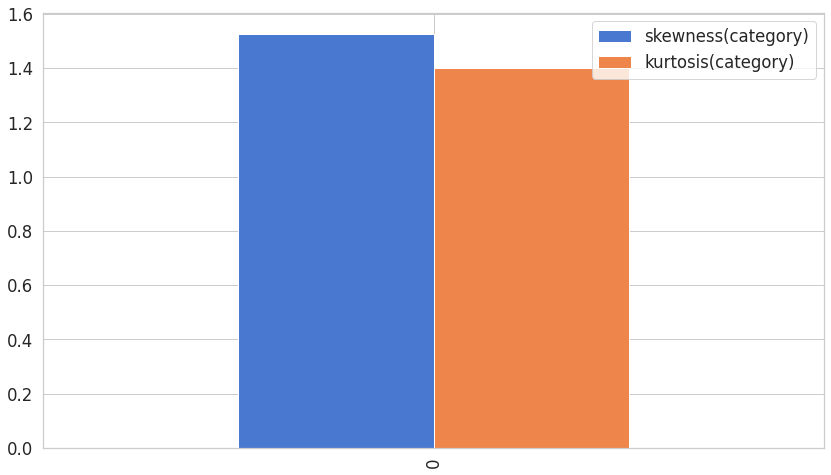

In [26]:
sk_bar=sk.toPandas()
sk_bar.plot.bar()

+-------+----------------+
|summary|        category|
+-------+----------------+
|  count|           10000|
|   mean|            1.75|
| stddev|1.13473731007502|
|    min|               1|
|    max|               5|
+-------+----------------+



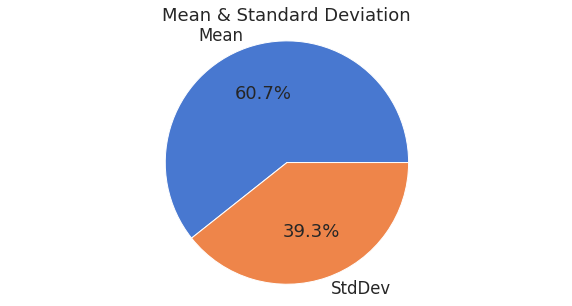

In [27]:


#Analytical method 1:finding mean and standard deviation from dataframe
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
qry = data_scale_output.describe('category')
qry.show()
data_summary = pd.DataFrame(qry.toPandas())
label = data_summary.values[:, 1]
f,ax = plt.subplots(figsize=(10, 5))
plt.pie([label[1],label[2]],labels=['Mean','StdDev'],autopct='%1.1f%%')
plt.title('Mean & Standard Deviation')
plt.axis('equal')
plt.show()

In [28]:
trainData, testData = data_scale_output.randomSplit([0.7, 0.3],seed=23)

print("Training Dataset Count: " + str(trainData.count()))


print("Test Dataset Count: " + str(testData.count()))

print(trainData.show(10))

Training Dataset Count: 7006
Test Dataset Count: 2994
+--------+--------------+------------------+--------------------+--------------------+
|category|Domain_encoded|        Domain_vec|               Price|  Standardized_Price|
+--------+--------------+------------------+--------------------+--------------------+
|       1|             1| (10000,[1],[1.0])|(10002,[0,1,3],[1...|(10002,[0,1,3],[0...|
|       1|             3| (10000,[3],[1.0])|(10002,[0,1,5],[1...|(10002,[0,1,5],[0...|
|       1|             4| (10000,[4],[1.0])|(10002,[0,1,6],[1...|(10002,[0,1,6],[0...|
|       1|             6| (10000,[6],[1.0])|(10002,[0,1,8],[1...|(10002,[0,1,8],[0...|
|       1|             7| (10000,[7],[1.0])|(10002,[0,1,9],[1...|(10002,[0,1,9],[0...|
|       1|            10|(10000,[10],[1.0])|(10002,[0,1,12],[...|(10002,[0,1,12],[...|
|       1|            11|(10000,[11],[1.0])|(10002,[0,1,13],[...|(10002,[0,1,13],[...|
|       1|            14|(10000,[14],[1.0])|(10002,[0,1,16],[...|(10002,[0,1

In [29]:
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(labelCol='category', 
                            featuresCol='Standardized_Price',
                            maxDepth=5)


In [30]:
model = rf.fit(trainData)

In [31]:
rf_predictions = model.transform(testData)

In [32]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

multi_evaluator = MulticlassClassificationEvaluator(labelCol = 'category', metricName = 'accuracy')
print('Random Forest classifier Accuracy:', multi_evaluator.evaluate(rf_predictions))

Random Forest classifier Accuracy: 0.604876419505678


Random Forest Test Error = 0.414997
Random Forest Accuracy = 0.585003


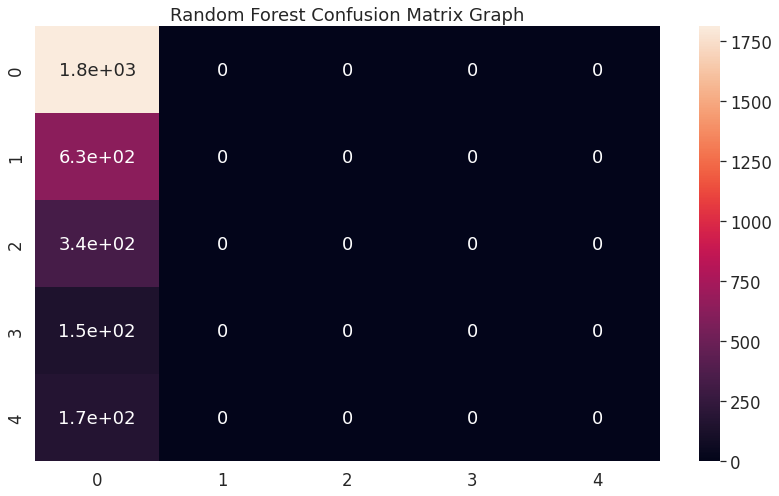

In [33]:
#Machine Learning Model 4: implementing Random Forest Algorithm
from pyspark.ml.classification import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import seaborn as sns

(training_data,test_data) = data_scale_output.randomSplit([0.7, 0.3])
rfc=RandomForestClassifier(featuresCol='Price',labelCol='category')
rfc_model=rfc.fit(training_data)
predictions=rfc_model.transform(test_data)
evaluator=MulticlassClassificationEvaluator(labelCol='category',metricName="accuracy")
accuracy=evaluator.evaluate(predictions)
print("Random Forest Test Error = %g" % (1.0-accuracy))
print("Random Forest Accuracy = %g" % (accuracy))
ytrue=predictions.select(['category']).collect()
ypred=predictions.select(['prediction']).collect()
cm=confusion_matrix(ytrue, ypred)
sns.heatmap(cm,annot=True)
plt.title('Random Forest Confusion Matrix Graph')
plt.show()

Random Forest Test Error = 0.416917
Random Forest Accuracy = 0.583083


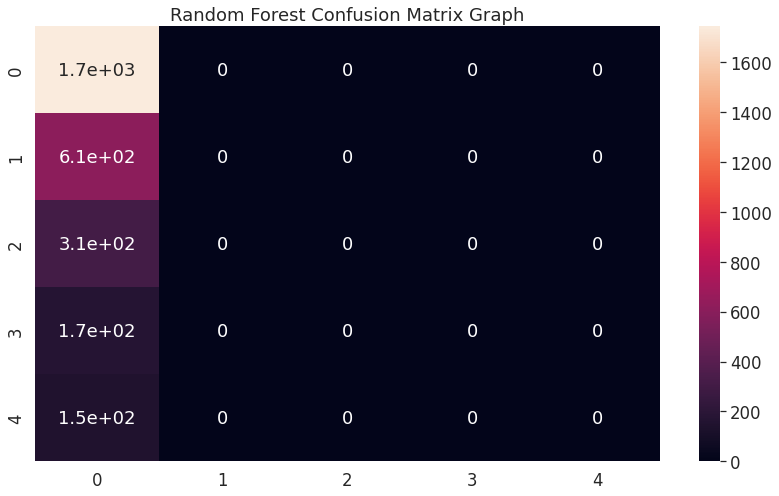

In [34]:
#Machine Learning Model 4: implementing Random Forest Algorithm
from pyspark.ml.classification import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import seaborn as sns

(training_data,test_data) = data_scale_output.randomSplit([0.7, 0.3])
rfc=RandomForestClassifier(featuresCol='Price',labelCol='category')
rfc_model=rfc.fit(training_data)
predictions=rfc_model.transform(test_data)
evaluator=MulticlassClassificationEvaluator(labelCol='category',metricName="accuracy")
accuracy=evaluator.evaluate(predictions)
print("Random Forest Test Error = %g" % (1.0-accuracy))
print("Random Forest Accuracy = %g" % (accuracy))
ytrue=predictions.select(['category']).collect()
ypred=predictions.select(['prediction']).collect()
cm=confusion_matrix(ytrue, ypred)
sns.heatmap(cm,annot=True)
plt.title('Random Forest Confusion Matrix Graph')
plt.show()

Random Forest Test Error = 0.558413
Random Forest Accuracy = 0.441587


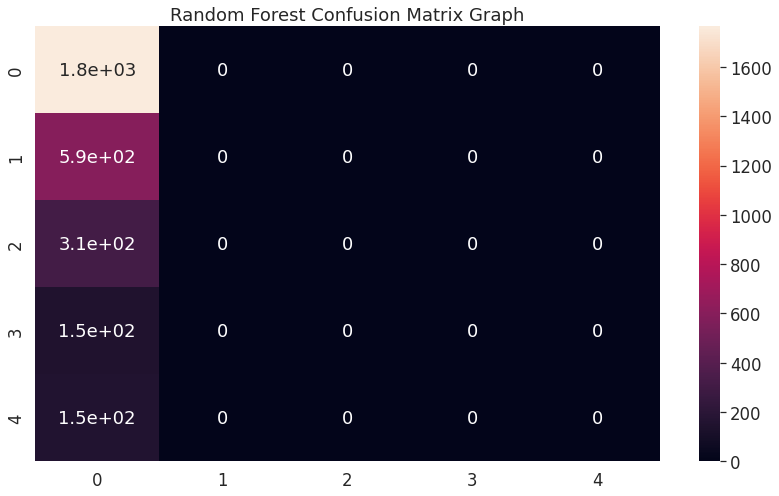

In [67]:
#Machine Learning Model 4: implementing Random Forest Algorithm
from pyspark.ml.classification import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import seaborn as sns

(training_data,test_data) = data_scale_output.randomSplit([0.7, 0.3])
rfc=RandomForestClassifier(featuresCol='Price',labelCol='category')
rfc_model=rfc.fit(training_data)
predictions=rfc_model.transform(test_data)
evaluator=MulticlassClassificationEvaluator(labelCol='category',metricName="f1")
accuracy=evaluator.evaluate(predictions)
print("Random Forest Test Error = %g" % (1.0-accuracy))
print("Random Forest Accuracy = %g" % (accuracy))
ytrue=predictions.select(['category']).collect()
ypred=predictions.select(['prediction']).collect()
cm=confusion_matrix(ytrue, ypred)
sns.heatmap(cm,annot=True)
plt.title('Random Forest Confusion Matrix Graph')
plt.show()

Random Forest Test Error = 0.654423
Random Forest Accuracy = 0.345577


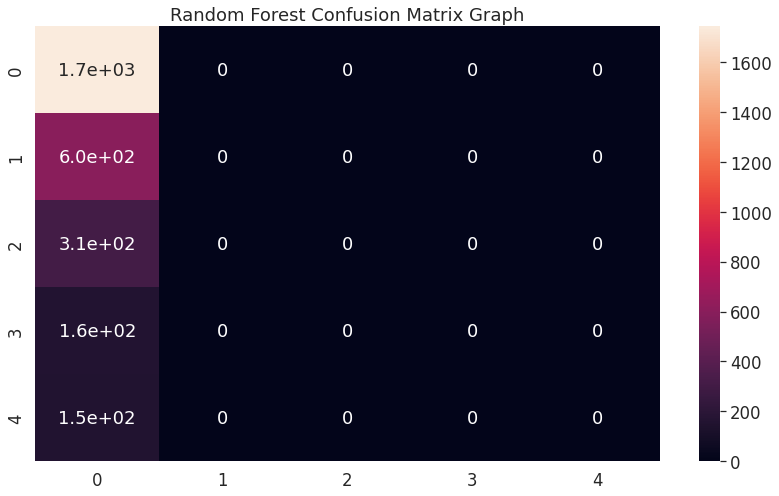

In [68]:
#Machine Learning Model 4: implementing Random Forest Algorithm
from pyspark.ml.classification import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import seaborn as sns

(training_data,test_data) = data_scale_output.randomSplit([0.7, 0.3])
rfc=RandomForestClassifier(featuresCol='Price',labelCol='category')
rfc_model=rfc.fit(training_data)
predictions=rfc_model.transform(test_data)
evaluator=MulticlassClassificationEvaluator(labelCol='category',metricName="weightedPrecision")
accuracy=evaluator.evaluate(predictions)
print("Random Forest Test Error = %g" % (1.0-accuracy))
print("Random Forest Accuracy = %g" % (accuracy))
ytrue=predictions.select(['category']).collect()
ypred=predictions.select(['prediction']).collect()
cm=confusion_matrix(ytrue, ypred)
sns.heatmap(cm,annot=True)
plt.title('Random Forest Confusion Matrix Graph')
plt.show()

Random Forest Test Error = 0.398403
Random Forest Accuracy = 0.601597


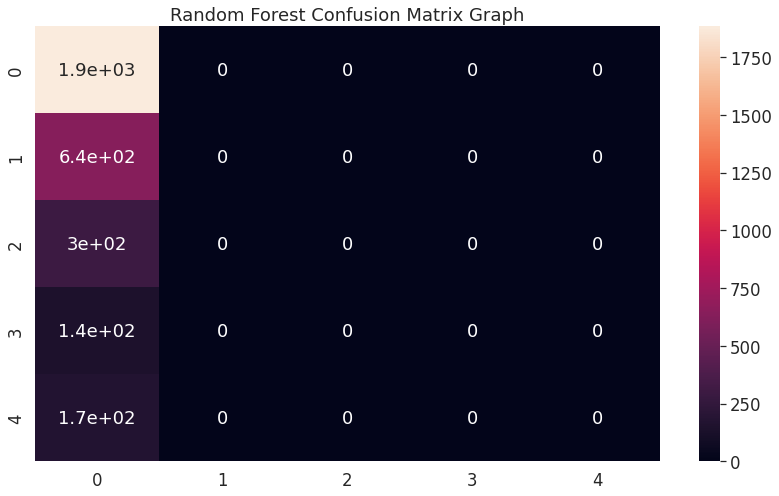

In [69]:
#Machine Learning Model 4: implementing Random Forest Algorithm
from pyspark.ml.classification import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import seaborn as sns

(training_data,test_data) = data_scale_output.randomSplit([0.7, 0.3])
rfc=RandomForestClassifier(featuresCol='Price',labelCol='category')
rfc_model=rfc.fit(training_data)
predictions=rfc_model.transform(test_data)
evaluator=MulticlassClassificationEvaluator(labelCol='category',metricName="weightedRecall")
accuracy=evaluator.evaluate(predictions)
print("Random Forest Test Error = %g" % (1.0-accuracy))
print("Random Forest Accuracy = %g" % (accuracy))
ytrue=predictions.select(['category']).collect()
ypred=predictions.select(['prediction']).collect()
cm=confusion_matrix(ytrue, ypred)
sns.heatmap(cm,annot=True)
plt.title('Random Forest Confusion Matrix Graph')
plt.show()

In [44]:
#importing all python and pyspark packages
# import findspark
from functools import reduce
from pyspark.sql import DataFrame
from pyspark.sql import functions as F
import matplotlib.pyplot as mplt
import pandas as pds
from pyspark.sql import SQLContext
import seaborn as sns
from pyspark.ml.stat import ChiSquareTest
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer
from pyspark.ml.stat import Summarizer
from pyspark.sql.types import Row
from pyspark.ml.stat import Correlation
import numpy as np
from pyspark.sql.functions import desc
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from pyspark.ml.classification import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.feature import PCA
from pyspark.ml import Pipeline
from pyspark.sql import SparkSession

In [63]:
#Machine Learning Model2 : Decision Tree Classifier
(training_data,test_data) = data_scale_output.randomSplit([0.7,0.3])
decision_tree=DecisionTreeClassifier(featuresCol='Price',labelCol='category',maxDepth=3)
decision_tree_model=decision_tree.fit(training_data)
predictions=decision_tree_model.transform(test_data)
evaluator=MulticlassClassificationEvaluator(labelCol='category',metricName="accuracy")
accuracy=evaluator.evaluate(predictions)
print("Decision Tree Classification Test Error = %g" % (1.0 - accuracy))
print("Decision Tree Accuracy = %g" % (accuracy))
ytrue = predictions.select(['Price']).collect()
ypred = predictions.select(['prediction']).collect()
# print('Decision Tree Classification Report')
# print(classification_report(ytrue, ypred))


Decision Tree Classification Test Error = 0.0540906
Decision Tree Accuracy = 0.945909


In [64]:
#Machine Learning Model2 : Decision Tree Classifier
(training_data,test_data) = data_scale_output.randomSplit([0.7,0.3])
decision_tree=DecisionTreeClassifier(featuresCol='Price',labelCol='category',maxDepth=3)
decision_tree_model=decision_tree.fit(training_data)
predictions=decision_tree_model.transform(test_data)
evaluator=MulticlassClassificationEvaluator(labelCol='category',metricName="f1")
accuracy=evaluator.evaluate(predictions)
print("Decision Tree Classification Test Error = %g" % (1.0 - accuracy))
print("Decision Tree Accuracy = %g" % (accuracy))
ytrue = predictions.select(['Price']).collect()
ypred = predictions.select(['prediction']).collect()
# print('Decision Tree Classification Report')
# print(classification_report(ytrue, ypred))


Decision Tree Classification Test Error = 0.070155
Decision Tree Accuracy = 0.929845


In [65]:
#Machine Learning Model2 : Decision Tree Classifier
(training_data,test_data) = data_scale_output.randomSplit([0.7,0.3])
decision_tree=DecisionTreeClassifier(featuresCol='Price',labelCol='category',maxDepth=3)
decision_tree_model=decision_tree.fit(training_data)
predictions=decision_tree_model.transform(test_data)
evaluator=MulticlassClassificationEvaluator(labelCol='category',metricName="weightedPrecision")
accuracy=evaluator.evaluate(predictions)
print("Decision Tree Classification Test Error = %g" % (1.0 - accuracy))
print("Decision Tree Accuracy = %g" % (accuracy))
ytrue = predictions.select(['Price']).collect()
ypred = predictions.select(['prediction']).collect()
# print('Decision Tree Classification Report')
# print(classification_report(ytrue, ypred))


Decision Tree Classification Test Error = 0.0713761
Decision Tree Accuracy = 0.928624


In [66]:
#Machine Learning Model2 : Decision Tree Classifier
(training_data,test_data) = data_scale_output.randomSplit([0.7,0.3])
decision_tree=DecisionTreeClassifier(featuresCol='Price',labelCol='category',maxDepth=3)
decision_tree_model=decision_tree.fit(training_data)
predictions=decision_tree_model.transform(test_data)
evaluator=MulticlassClassificationEvaluator(labelCol='category',metricName="weightedRecall")
accuracy=evaluator.evaluate(predictions)
print("Decision Tree Classification Test Error = %g" % (1.0 - accuracy))
print("Decision Tree Accuracy = %g" % (accuracy))
ytrue = predictions.select(['Price']).collect()
ypred = predictions.select(['prediction']).collect()
# print('Decision Tree Classification Report')
# print(classification_report(ytrue, ypred))


Decision Tree Classification Test Error = 0.0496032
Decision Tree Accuracy = 0.950397


In [53]:
# cm=confusion_matrix(ytrue, ypred)
# sns.heatmap(cm,annot=True)
# plt.title('Random Forest Confusion Matrix Graph')
# plt.show()

In [57]:
#implemnting machine learning model called Logistic Regression using PYSPARK ML models
(training_data,test_data) = data_scale_output.randomSplit([0.7, 0.3])
lr = LogisticRegression(labelCol='category',featuresCol='Price')
model = lr.fit(training_data)
predictions = model.transform(test_data)
# obtain evaluator.
evaluator = MulticlassClassificationEvaluator(labelCol='category',metricName="accuracy")
# compute the classification error on test data.
accuracy = evaluator.evaluate(predictions)
print("Logistic Regression Output")
print("Test Error = %g" % (1.0 - accuracy))
print("Accuracy = %g" % (accuracy))
trainSummary = model.summary
print(trainSummary)

Logistic Regression Output
Test Error = 0.375042
Accuracy = 0.624958


In [59]:
#implemnting machine learning model called Logistic Regression using PYSPARK ML models
(training_data,test_data) = data_scale_output.randomSplit([0.7, 0.3])
lr = LogisticRegression(labelCol='category',featuresCol='Price')
model = lr.fit(training_data)
predictions = model.transform(test_data)
# obtain evaluator.
evaluator = MulticlassClassificationEvaluator(labelCol='category',metricName="f1")
# compute the classification error on test data.
accuracy = evaluator.evaluate(predictions)
print("Logistic Regression Output")
print("Test Error = %g" % (1.0 - accuracy))
print("Accuracy = %g" % (accuracy))
trainSummary = model.summary
print(trainSummary)

Logistic Regression Output
Test Error = 0.514618
Accuracy = 0.485382


In [60]:
#implemnting machine learning model called Logistic Regression using PYSPARK ML models
(training_data,test_data) = data_scale_output.randomSplit([0.7, 0.3])
lr = LogisticRegression(labelCol='category',featuresCol='Price')
model = lr.fit(training_data)
predictions = model.transform(test_data)
# obtain evaluator.
evaluator = MulticlassClassificationEvaluator(labelCol='category',metricName="weightedPrecision")
# compute the classification error on test data.
accuracy = evaluator.evaluate(predictions)
print("Logistic Regression Output")
print("Test Error = %g" % (1.0 - accuracy))
print("Accuracy = %g" % (accuracy))
trainSummary = model.summary
print(trainSummary)

Logistic Regression Output
Test Error = 0.602855
Accuracy = 0.397145


In [61]:
#implemnting machine learning model called Logistic Regression using PYSPARK ML models
(training_data,test_data) = data_scale_output.randomSplit([0.7, 0.3])
lr = LogisticRegression(labelCol='category',featuresCol='Price')
model = lr.fit(training_data)
predictions = model.transform(test_data)
# obtain evaluator.
evaluator = MulticlassClassificationEvaluator(labelCol='category',metricName="weightedRecall")
# compute the classification error on test data.
accuracy = evaluator.evaluate(predictions)
print("Logistic Regression Output")
print("Test Error = %g" % (1.0 - accuracy))
print("Accuracy = %g" % (accuracy))
trainSummary = model.summary
print(trainSummary)

Logistic Regression Output
Test Error = 0.387097
Accuracy = 0.612903
